# TP3 : Transmission sur frequence porteuse QPSK et 16 QAM

Insertion des librairies :

In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np

Import des modules :

In [2]:
import commNumEJ; from commNumEJ import Mesures
importlib.reload(commNumEJ)

<module 'commNumEJ' from 'e:\\BUT-2\\Signal_Num\\Modulation_numérique(8) - Copie\\TP3\\commNumEJ.py'>

In [3]:
import commNumEJ; from commNumEJ import Modem 
importlib.reload(commNumEJ)

<module 'commNumEJ' from 'e:\\BUT-2\\Signal_Num\\Modulation_numérique(8) - Copie\\TP3\\commNumEJ.py'>

In [4]:
import commNumEJ; from commNumEJ import Test
importlib.reload(commNumEJ)

<module 'commNumEJ' from 'e:\\BUT-2\\Signal_Num\\Modulation_numérique(8) - Copie\\TP3\\commNumEJ.py'>

Le phase-shift keying (ou PSK, soit « modulation par changement de phase ») désigne une famille de formes de modulations numériques qui ont toutes pour principe de véhiculer de l'information binaire via la phase d'un signal de référence (porteuse), et exclusivement par ce biais.

Souvent connue sous le nom de 4-PSK ou QPSK, cette modulation utilise un diagramme de constellation à quatre points, à équidistance autour d'un cercle. Avec quatre phases, QPSK peut coder deux bits par symbole. Cela permet de multiplier le débit binaire par deux comparé à un système BPSK tout en maintenant la bande passante du signal, ou de maintenir le débit en réduisant la bande passante utilisée par deux.

## 1-Emetteur QPSK

On veut créer un émetteur QPSK, Rappeler le bloc supplémentaire ( en émissions et réception ) pour une modulation sur fréquence porteuse par rapport aux modulations en bande de base et expliquer son rôle.
Rappeler de plus la différence sur le type de symbole de modulation pour une modulation PSK ( ou QAM ) par rapport aux modulation PAM ou ASK

La différence principale entre les symboles de modulation dans une modulation PSK (Phase Shift Keying) ou QAM (Quadrature Amplitude Modulation) par rapport aux modulations PAM (Pulse Amplitude Modulation) ou ASK (Amplitude Shift Keying) réside dans les dimensions utilisées pour coder l'information et la manière dont les symboles sont distribués dans l'espace des signaux.
- Ex : 
    - PAM/ASK : Les symboles sont codés uniquement sur une dimension (l'amplitude d'un signal).
    - PSK : Les symboles sont représentés dans un espace bidimensionnel (coordonnées en phase et quadrature, c’est-à-dire I-Q).

Pour une modulation PSK ou QAM, les symboles de modulation sont complexes et le calcul de
distance se fait donc sur 2 dimensions : la partie réelle et la partie imaginaire. La distance entre le
symbole reçu et un symbole de modulation de la constellation peut se faire à l’aide du théorème de
Pythagore

Pour cela on va compléter la méthode "create_MP" et "mapping" de la classe "Modem" pour une modulation 4PSK. On introduira un nouveau paramètre nommé "phase_origine" par défaut définit à 0, qui permettra de faire tourner la constellationde la modulation. Pour cela on multipliera l'ensemble des valeurs du dictionnaire associé à la table de mapping par une exponentielle complexe.

Ici, on va créer un signal QPSK avec 2000 symboles aléatoires, avec une amplitude la sinusoïdede √2 et une phase à l'origine de π/4

Les bits générés sont :
[0 0 0 ... 0 0 1]

Les symboles modulés (QPSK) sont :
[-0.47140452+0.47140452j -0.47140452+0.47140452j  0.47140452-0.47140452j
 ...  0.47140452+0.47140452j -0.47140452-0.47140452j
  0.47140452+0.47140452j]


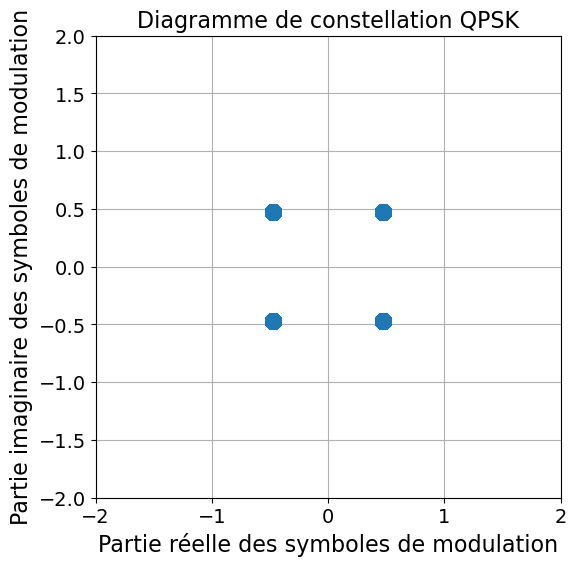

In [5]:
# Générer 2000 symboles QPSK, soit 4000 bits
nb_symboles = 2000
bits = np.random.binomial(1, 0.5, nb_symboles * 2)  # 2 bits par symbole, soit 2000 * 2 bits

# Créer un objet Modem pour QPSK
modem = Modem(ModType='PSK', NbSymboles=4, bits=bits)

# Mapping des symboles QPSK avec une amplitude √2 et une phase d'origine π/4
amplitude = np.sqrt(2)
phase_origine = 0
symboles_mod = modem.mapping(amplitude, phase_ori=phase_origine)

# Afficher les bits générés et les symboles modulés
print("Les bits générés sont :")
print(bits)

print("\nLes symboles modulés (QPSK) sont :")
print(symboles_mod)

# Affichage du diagramme de constellation
Mesures.diagramme_constellation(symboles_mod, taille_fenetre=4, titre="Diagramme de constellation QPSK")


On souhaite ensuite réaliser une modulation QPSK avec les caractéristiques :

-> Rapidité de modulation = 50 symbs/s

-> Fréquence d'échantillonage : 10KHz

-> Fréquence porteuse : 500 Hz

#######################################################################################################################################################################################

Le débit binaire **D**, en **bit/s**, correspond à la vitesse de variation des données binaires avec
**D=1/Tb**, **Tb** étant égal à la durée d’un bit.

La rapidité de modulation **R** correspond à la vitesse de variation des symboles de modulation
servant à faire varier/moduler la forme de signal. La rapidité de modulation est en **symboles/s** ou
en **bauds** (venant de Mr Baudot son inventeur). **R=1/Ts**, **Ts** étant égal à la durée d’un symbole de
modulation.

Pour déterminer la rapidité de modulation R d’un signal modulé connaissant le débit D et le
nombre de symboles de la modulation, il suffit d’exprimer la durée TS d’un symbole par rapport
à la durée TB d’un bit. Dans le cas de la modulation PAM4 précédente, un symbole de modulation
dure 2 bits et on a donc :

$T_b = 2 \cdot T_s \Rightarrow T_s = \frac{1}{2} \cdot T_b \Rightarrow R_b = \frac{D}{2}$


La fréquence d’échantillonnage fE = 1/TE est en Hz ou
échantillons /seconde (Sample / second Sa/s en anglais).

#############################################################################################################################################################################

Dans le cas de QPSK, il y a 2 bits par symbole; DONC :

D = R x 2

  = 50 x 2
  
  = 100 bits/s

Pour le calcul du temps bit ( Tb ) :

Tb = 1 / Rb

   = 1 / 100
   
   = 0.01

Pour le calcul du facteur de sur-échantillonage :

L = Fe / Rs

  = 10000 / 50

  = 20

######################################################################################

Envoyer les symboles de modulation vers le filtre de mise en forme rectangulaire (méthode
filtre_MF de la classe Modem) pour obtenir l’enveloppe complexe c’est-à-dire le signal
QPSK en bande de base. Afficher les bits, symbole de modulation et le signal numérique
pseudo continu obtenu.

In [6]:
# Paramètres donnés dans l'énoncé
frequence_modulation = 50  # en symboles/s
frequence_echantillonnage = 10000  # en Hz

# Calcul du débit binaire et du temps bit
debit_binaire = frequence_modulation * 2  # 2 bits par symbole QPSK
temps_bit = 1 / debit_binaire  # Temps pour un bit
facteur_sur_echantillonnage = frequence_echantillonnage / frequence_modulation  # Nombre d'échantillons par symbole

# Filtrage des symboles modulés avec le filtre de mise en forme
symboles_filtrés = modem.filtre_MF(symboles_mod, NbEchParSymb=facteur_sur_echantillonnage)


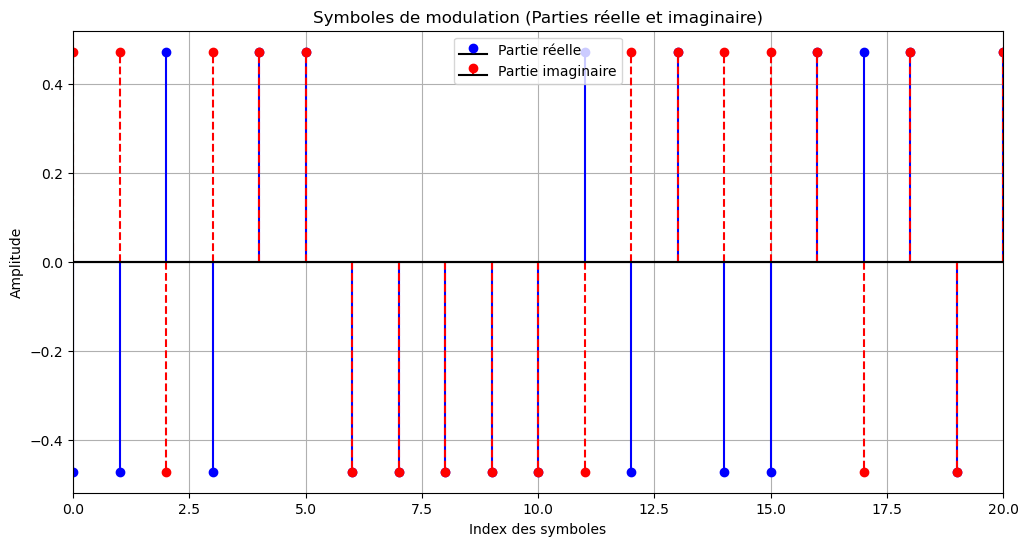

<function matplotlib.pyplot.show(close=None, block=None)>

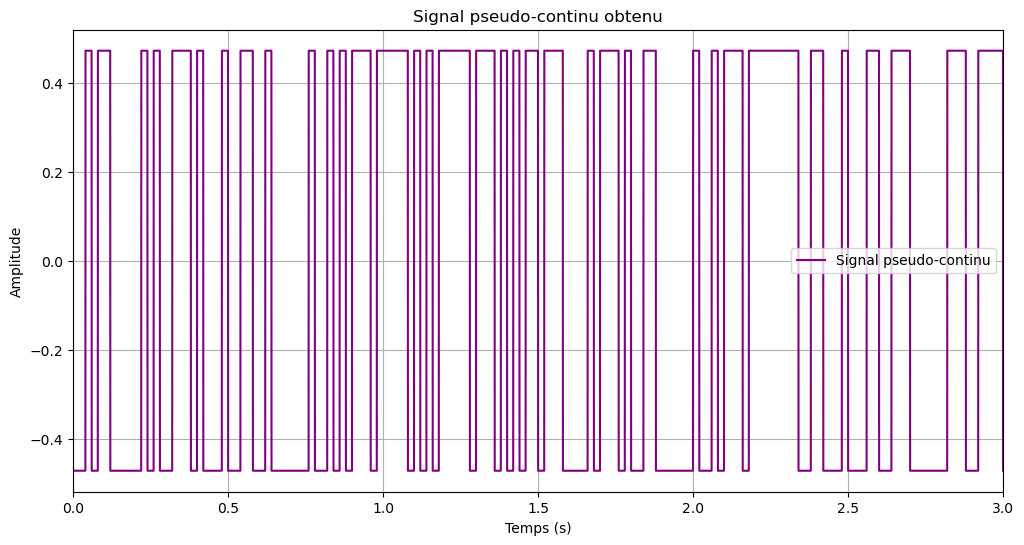

In [7]:

# --- Affichage des symboles de modulation ---
n = np.arange(len(symboles_mod))  # Index des symboles
plt.figure(figsize=(12, 6))
plt.stem(n, np.real(symboles_mod), markerfmt='bo', linefmt='b-', basefmt='k', label="Partie réelle")
plt.stem(n, np.imag(symboles_mod), markerfmt='ro', linefmt='r--', basefmt='k', label="Partie imaginaire")
plt.title("Symboles de modulation (Parties réelle et imaginaire)")
plt.xlim(0,20)
plt.xlabel("Index des symboles")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# --- Affichage du signal pseudo-continu ---
temps = np.arange(len(symboles_filtrés)) / frequence_echantillonnage  # Temps en secondes
plt.figure(figsize=(12, 6))
plt.plot(temps, np.real(symboles_filtrés), label="Signal pseudo-continu", color="purple")
plt.xlim(0,3)
plt.title("Signal pseudo-continu obtenu")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show


Nous allons enuite créer une nouvelle méthode d’instance appellée upconv dans notre classe Modem pour effectuer la translation de fréquence vers une fréquence plus haute appelée « upconversion » :
- Prend comme paramètres le signal en bande de base (enveloppe complexe), la fréquence
porteuse et la période d’échantillonnage
- Retourne le signal modulé

Avec cette nouvelle méthode d'instance "upconv", nous allons effectuer la translation de fréquence de l'enveloppe complexe et afficher avec Matplotlib les bits, les symboles de modulation et le signal modulé QPSK

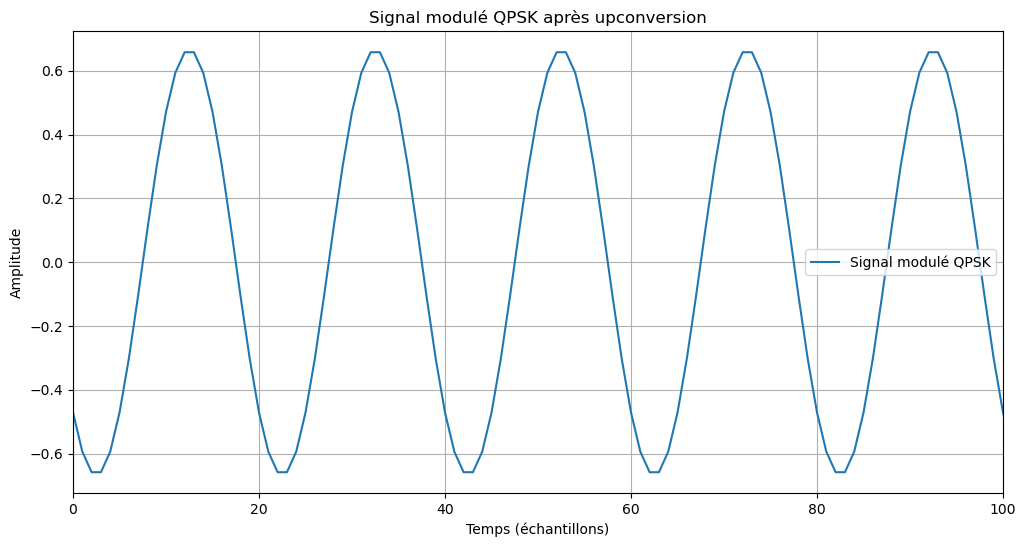

In [8]:
# Paramètres de la modulation
frequence_porteuse = 500  # Fréquence de la porteuse pour la translation de fréquence
te = 1 / frequence_echantillonnage  # Période d'échantillonnage

# Translation de fréquence (upconversion) pour produire le signal modulé
signal_modulé = modem.upconv(symboles_filtrés, frequence_porteuse, te)

# Affichage du signal modulé QPSK
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(signal_modulé)), signal_modulé, label="Signal modulé QPSK")
plt.title("Signal modulé QPSK après upconversion")
plt.xlabel("Temps (échantillons)")
plt.ylabel("Amplitude")
plt.xlim(0,100)
plt.grid(True)
plt.legend()
plt.show()


## 2-Canal AWGN

Nous allons ajouter un bruit blanc gaussien à notre signal QPSK avec une moyenne de 0 et une variance de 0.2

Puis nous allons afficher avec matplotlib le signal QPSK et le signal QPSK bruité

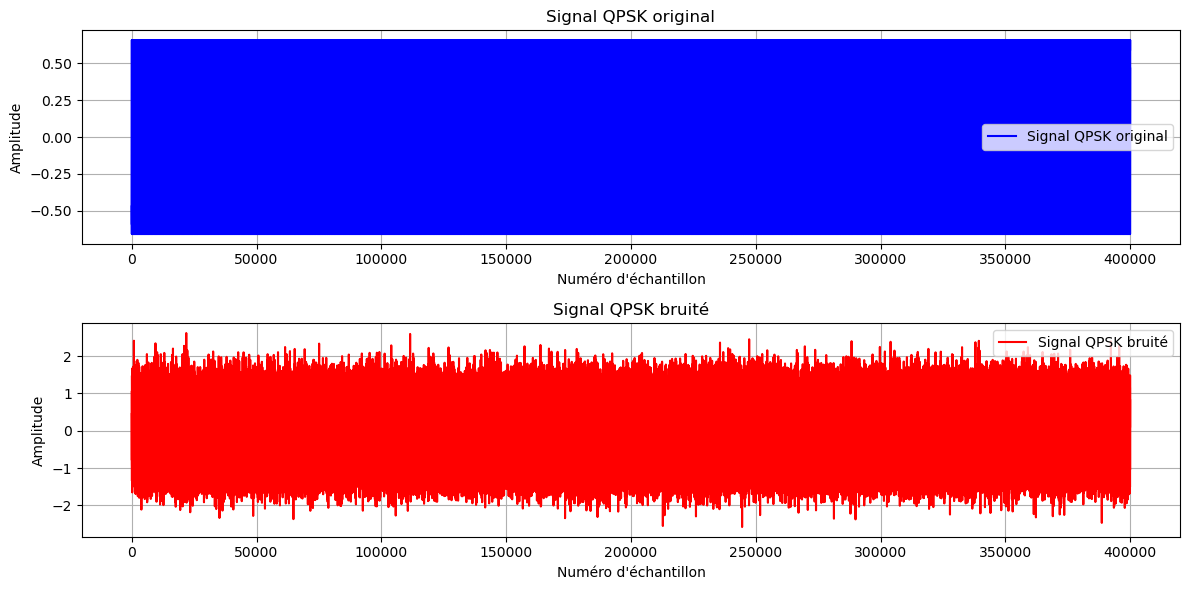

In [9]:
# Ajouter le bruit blanc gaussien
variance_bruit = 0.2  # Variance du bruit
bruit = np.sqrt(variance_bruit) * np.random.randn(len(signal_modulé))  # Bruit gaussien

# Signal QPSK bruité
signal_bruité = signal_modulé + bruit

# Affichage des signaux
plt.figure(figsize=(12, 6))

# Graphique du signal QPSK original
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(signal_modulé)), signal_modulé, label="Signal QPSK original", color='blue')
plt.title("Signal QPSK original")
plt.xlabel("Numéro d'échantillon")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

# Graphique du signal QPSK bruité
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(signal_bruité)), signal_bruité, label="Signal QPSK bruité", color='red')
plt.title("Signal QPSK bruité")
plt.xlabel("Numéro d'échantillon")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Récepteur QPSK

Nous allons créer une nouvelle méthode "downconv" dans notre classe "modem" pour effectuer la translation de fréquence downconversion avec comme craractéristiques :

- Prend comme paramètre le signal modulé sur fréquence porteuse, la fréquence porteuse, la période d'échantillonage, et le type de symbole 
- retourne le signal translaté en bade de base

In [10]:
demod_signal = modem.downconv(signal_bruité, frequence_porteuse, 1/frequence_echantillonnage, symb_type='complexe')

ensuite, à l'aide de ma classe "Mesure", j'affiche la DSP du signal

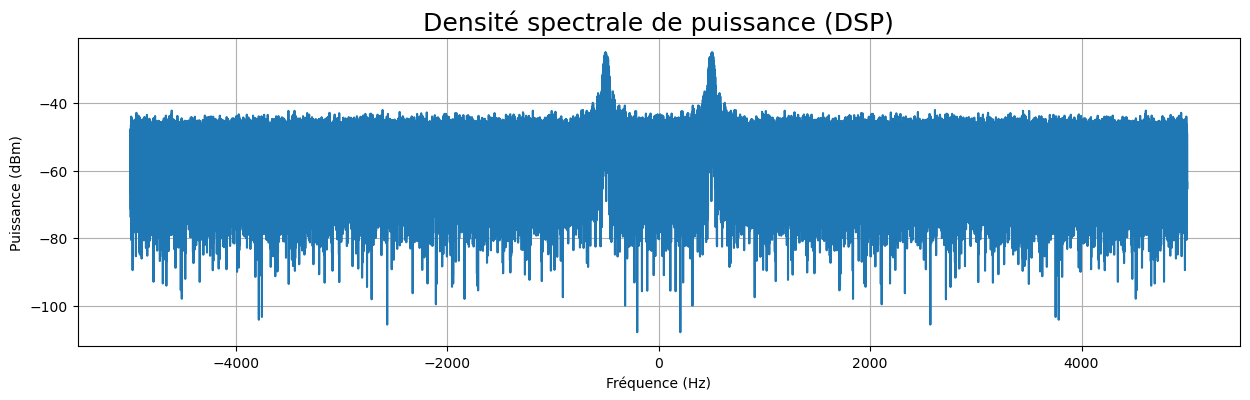

In [11]:
DSP_QPSK = Mesures(signal_bruité, frequence_echantillonnage)
DSP_QPSK.DSP(aff='bila', unit='dBm')



Nous allons créer une nouvelle méthode "filtre_rcv" dans notrre classe "Modem" pour effectuer le filtrage en réception ici après downconversion  avec comme caractéristiques : 
- Prend en paramètres : le signal à filtrer, le type de filtre, la fréquence de coupure, la fréquence de d'échantillonage et l'ordre
- retourne le signal filtré

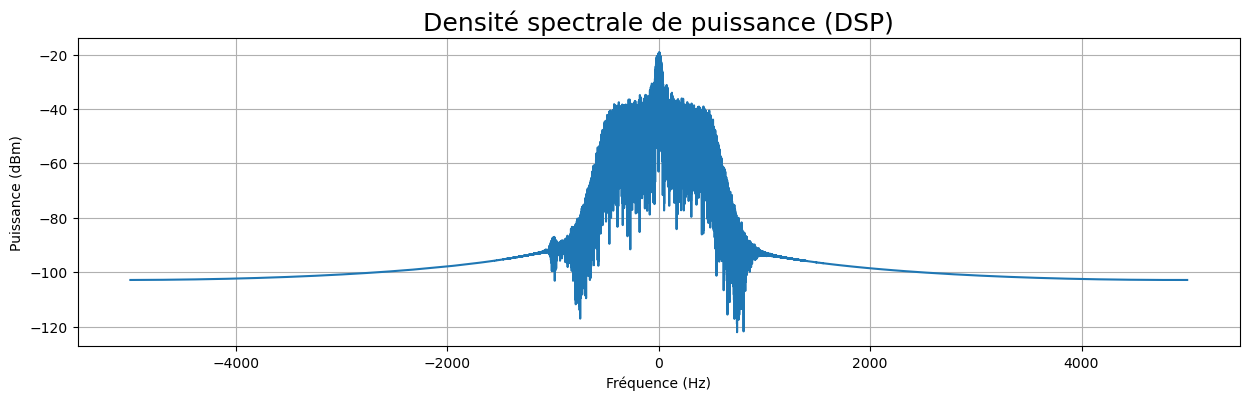

In [12]:
# Filtrage pour garder la partie du spectre en bande de base
filtered_signal = 2 * modem.filtre_rcv(demod_signal, frequence_echantillonnage, fc=500, type="butter")

# Création de l'objet de mesure et affichage de la DSP
MyMesure = Mesures(filtered_signal, frequence_echantillonnage)
MyMesure.DSP(aff="bila", unit="dBm")


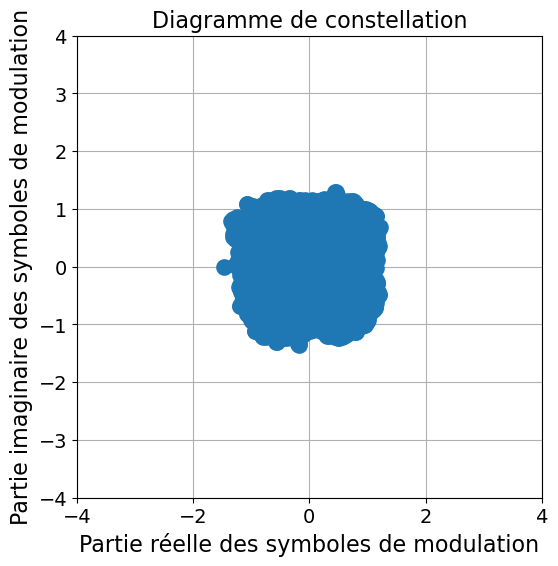

In [13]:
# Visualisation du diagramme de constellation du signal en bande de base 

constellation = Mesures(filtered_signal, frequence_echantillonnage)
constellation.diagramme_constellation(filtered_signal)

In [14]:
# Downsampling du signal
downsampling = int(facteur_sur_echantillonnage)
offset = int(downsampling/2)
print(downsampling)
downsampled_signal = modem.downsample(filtered_signal, downsampling, offset)

200


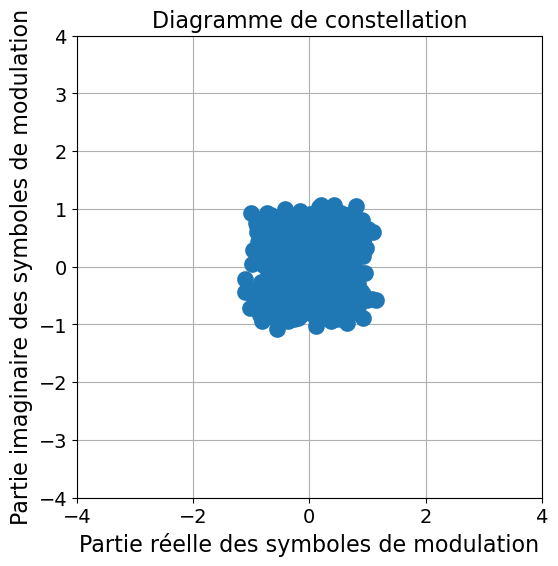

In [15]:
constellation2 = Mesures(downsampled_signal, frequence_echantillonnage)
constellation2.diagramme_constellation(downsampled_signal)

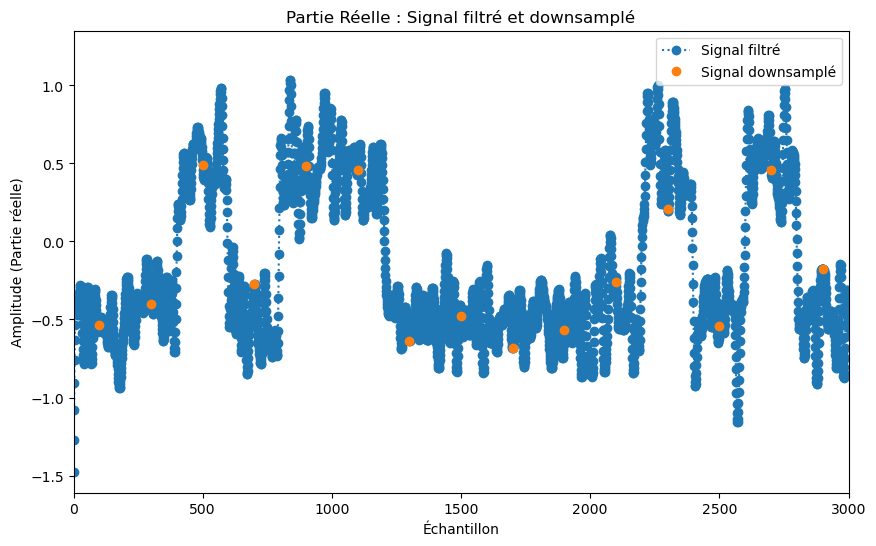

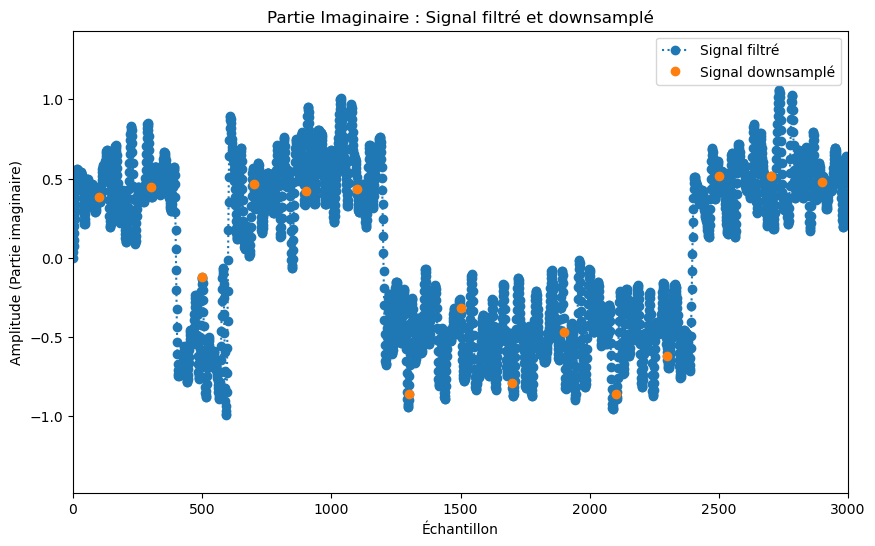

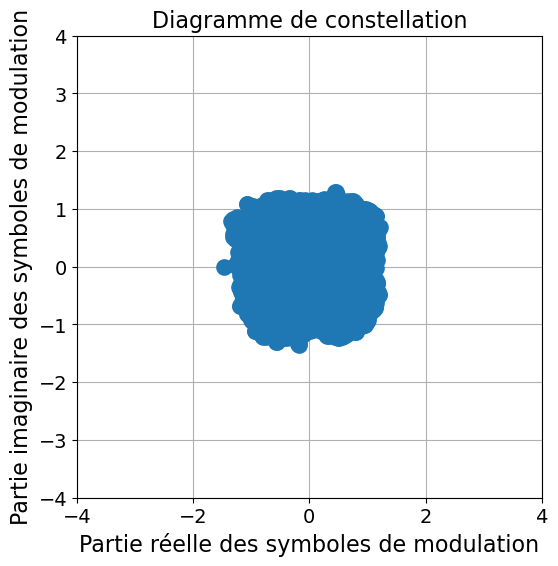

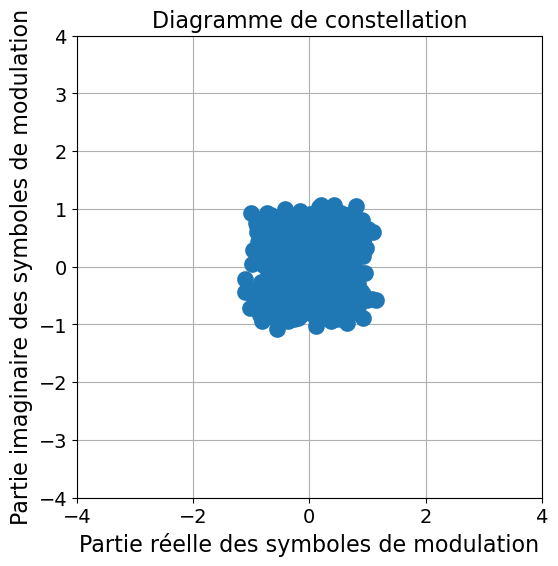

In [16]:
new_vector = np.arange(offset, len(filtered_signal), downsampling)

# Figure 1 : Partie réelle
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(np.real(filtered_signal), "o:", label="Signal filtré")
ax1.plot(new_vector, np.real(downsampled_signal), "o", label="Signal downsamplé")
ax1.set_xlim(0, 3000)
ax1.set_title("Partie Réelle : Signal filtré et downsamplé")
ax1.set_xlabel("Échantillon")
ax1.set_ylabel("Amplitude (Partie réelle)")
ax1.legend()
plt.show()

# Figure 2 : Partie imaginaire
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(np.imag(filtered_signal), "o:", label="Signal filtré")
ax2.plot(new_vector, np.imag(downsampled_signal), "o", label="Signal downsamplé")
ax2.set_xlim(0, 3000)
ax2.set_title("Partie Imaginaire : Signal filtré et downsamplé")
ax2.set_xlabel("Échantillon")
ax2.set_ylabel("Amplitude (Partie imaginaire)")
ax2.legend()
plt.show()

# Figure 3 : Constellation
constellation2.diagramme_constellation(filtered_signal)
constellation.diagramme_constellation(downsampled_signal)
plt.show()

In [19]:
# Détéction des symboles QPSK
detected_bits = modem.detection(symboles_mod)
print("Les bits détectés sont :", detected_bits)

print('les bits de départs sont : ' , symboles_mod)

Les bits détectés sont : [-0.47140452+0.47140452j -0.47140452+0.47140452j  0.47140452-0.47140452j
 ...  0.47140452+0.47140452j -0.47140452-0.47140452j
  0.47140452+0.47140452j]
les bits de départs sont :  [-0.47140452+0.47140452j -0.47140452+0.47140452j  0.47140452-0.47140452j
 ...  0.47140452+0.47140452j -0.47140452-0.47140452j
  0.47140452+0.47140452j]


In [20]:
# Démapping des symboles

demap_bits = modem.demapping(detected_bits)
print("Les bits de départs sont : " , bits)
print("Les bits détéctés : " , demap_bits.flatten())

Les bits de départs sont :  [0 0 0 ... 0 0 1]
Les bits détéctés :  [0 0 0 ... 0 0 1]


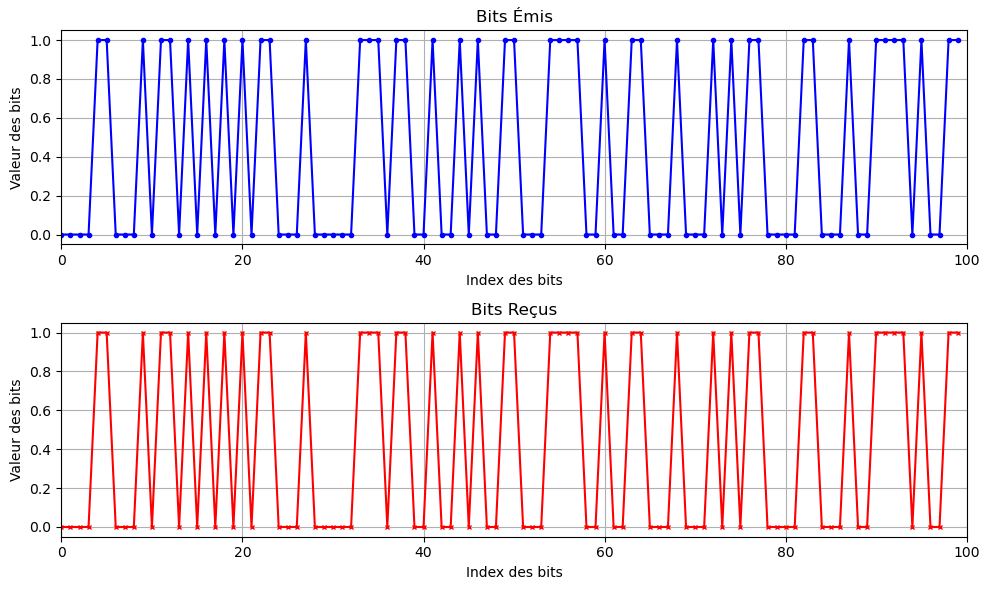

In [23]:


plt.figure(figsize=(10, 6))

# Affichage des bits émis
plt.subplot(2, 1, 1)
plt.plot(bits[:100], label='Bits émis', color='blue', marker='o', linestyle='-', markersize=3)  # Zoom sur les 100 premiers bits
plt.title("Bits Émis")
plt.xlabel("Index des bits")
plt.ylabel("Valeur des bits")
plt.grid(True)
plt.xlim(0, 100)  # Limite sur l'axe des X pour zoomer

# Affichage des bits reçus
plt.subplot(2, 1, 2)
plt.plot(demap_bits.flatten()[:100], label='Bits reçus', color='red', marker='x', linestyle='-', markersize=3)  # Zoom sur les 100 premiers bits
plt.title("Bits Reçus")
plt.xlabel("Index des bits")
plt.ylabel("Valeur des bits")
plt.grid(True)
plt.xlim(0, 100)  # Limite sur l'axe des X pour zoomer

# Affichage
plt.tight_layout()
plt.show()


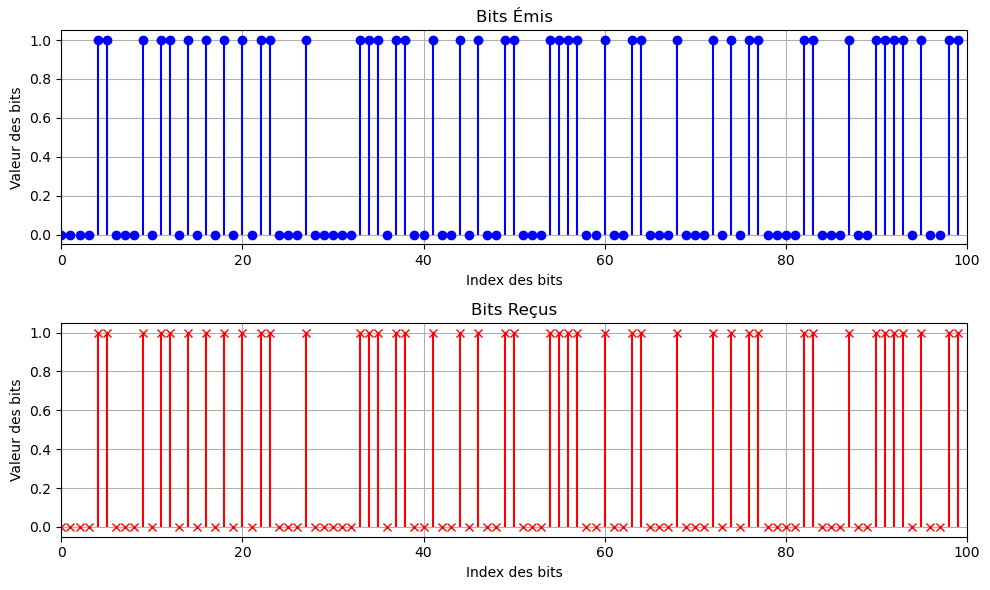

In [25]:

plt.figure(figsize=(10, 6))

# Affichage des bits émis
plt.subplot(2, 1, 1)
plt.stem(range(100), bits[:100], label='Bits émis', basefmt=" ", linefmt='b-', markerfmt='bo')  # Zoom sur les 100 premiers bits
plt.title("Bits Émis")
plt.xlabel("Index des bits")
plt.ylabel("Valeur des bits")
plt.grid(True)
plt.xlim(0, 100)  # Limite sur l'axe des X pour zoomer

# Affichage des bits reçus
plt.subplot(2, 1, 2)
plt.stem(range(100), demap_bits.flatten()[:100], label='Bits reçus', basefmt=" ", linefmt='r-', markerfmt='rx')  # Zoom sur les 100 premiers bits
plt.title("Bits Reçus")
plt.xlabel("Index des bits")
plt.ylabel("Valeur des bits")
plt.grid(True)
plt.xlim(0, 100)  # Limite sur l'axe des X pour zoomer

# Affichage
plt.tight_layout()
plt.show()
